<a href="https://colab.research.google.com/github/UnitForDataScience/DataVizSeminar/blob/main/A_Short_Intro_to_Data_Viz_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Short Intro to Data Viz with Python

By ASU Library's Unit for Data Science and Analytics

# Case study: Exploring how GDP per Capita influences Life Expectancy

---

Let's start putting our skills to the test. In this example, we will create a scatter plot that shows the relationship between a country's GDP per capita and the mean life expectancy of their people, and we will improve it step by step.



# Starting with the Classics: MatplotLib


---

Matplotlib is one of the oldest data visualization packages out there. Advanced customization requires some time (and code), but it is a great place to start. We will begin by practicing the recipe we described.

In [ ]:
# Import the matplotlib and pandas packages and assign them an alias
import matplotlib.pyplot as plt
import pandas as pd

##Loading our Dataset
Our data comes from the "Gapminder" Dataset, which is available online. We will go step by step, following the general steps we described before. We will start by loading our first packages and use "pandas" to read the dataset from the link.

*This example is inspired by Hans Rosling's work with data visualization*

In [ ]:
# Load the Gapminder dataset from Plotly
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv")
print(df.head(12))                       # This function will allow us to see the first twelve rows of the dataset, and print it to our output



        country  year         pop continent  lifeExp   gdpPercap
0   Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1   Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2   Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3   Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4   Afghanistan  1972  13079460.0      Asia   36.088  739.981106
5   Afghanistan  1977  14880372.0      Asia   38.438  786.113360
6   Afghanistan  1982  12881816.0      Asia   39.854  978.011439
7   Afghanistan  1987  13867957.0      Asia   40.822  852.395945
8   Afghanistan  1992  16317921.0      Asia   41.674  649.341395
9   Afghanistan  1997  22227415.0      Asia   41.763  635.341351
10  Afghanistan  2002  25268405.0      Asia   42.129  726.734055
11  Afghanistan  2007  31889923.0      Asia   43.828  974.580338


##Filtering Your Dataset
We can filter the data set by any variable of interest. In the following cell, our code will filter the dataframe to show only data collected in the year 2007

In [ ]:
#Filter the dataset by year, we will focus on 2007 for now
df_year = df[df['year'] == 2007]         # Create a variable to filter the dataset for the year 2007
print(df_year.head())                  # This function will allow us to see the first twelve rows of the filtered dataset


        country  year         pop continent  lifeExp     gdpPercap
11  Afghanistan  2007  31889923.0      Asia   43.828    974.580338
23      Albania  2007   3600523.0    Europe   76.423   5937.029526
35      Algeria  2007  33333216.0    Africa   72.301   6223.367465
47       Angola  2007  12420476.0    Africa   42.731   4797.231267
59    Argentina  2007  40301927.0  Americas   75.320  12779.379640
         year           pop     lifeExp     gdpPercap
count   142.0  1.420000e+02  142.000000    142.000000
mean   2007.0  4.402122e+07   67.007423  11680.071820
std       0.0  1.476214e+08   12.073021  12859.937337
min    2007.0  1.995790e+05   39.613000    277.551859
25%    2007.0  4.508034e+06   57.160250   1624.842248
50%    2007.0  1.051753e+07   71.935500   6124.371108
75%    2007.0  3.121004e+07   76.413250  18008.835640
max    2007.0  1.318683e+09   82.603000  49357.190170


## Plotting the Data
 Now that we loaded and filtered our dataset, let's go ahead and plot Life Expectancy vs GDP per Capita for 2007

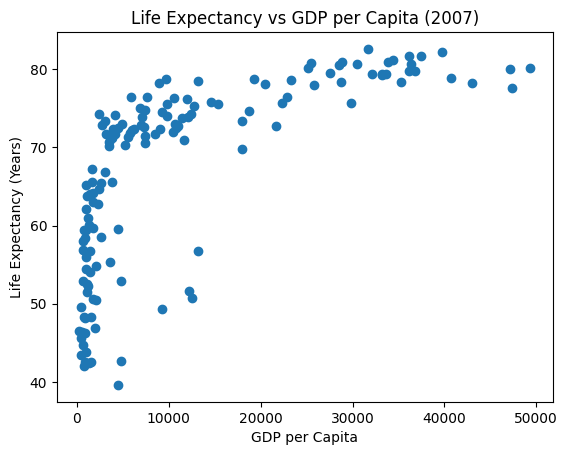

In [ ]:
# Basic scatter plot using Matplotlib
plt.scatter(df_year['gdpPercap'],
            df_year['lifeExp']
            )

# Add labels and title
plt.title('Life Expectancy vs GDP per Capita (2007)')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy (Years)')

# Show the plot
plt.show()

## What is good about this plot? What can be improved?

Let's go ahead and add some color to the continents to improve our takeaways

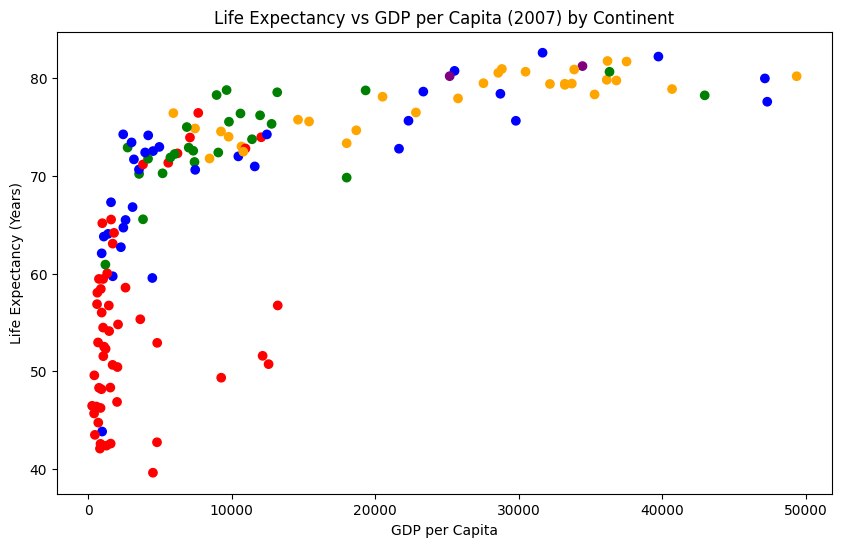

In [ ]:
# Define a color map for continents
continent_colors = {'Africa': 'red', 'Americas': 'green', 'Asia': 'blue', 'Europe': 'orange', 'Oceania': 'purple'}
colors = df_year['continent'].map(continent_colors)

# Create a scatter plot with colored continents
plt.figure(figsize=(10, 6)) #specify the size of our plot
plt.scatter(df_year['gdpPercap'],
            df_year['lifeExp'],
            c = colors)


# Add labels and title
plt.title('Life Expectancy vs GDP per Capita (2007) by Continent')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy (Years)')

# Show the plot
plt.show()

## Adding more context
Let's add some more context by taking into account the population size of each country

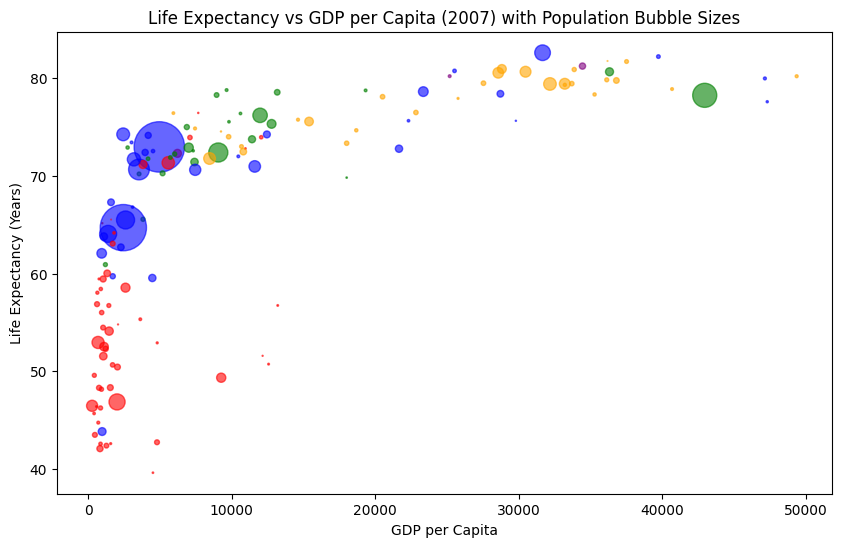

In [ ]:
# Create a scatter plot with bubble sizes based on population
plt.figure(figsize=(10, 6))
plt.scatter(df_year['gdpPercap'],
            df_year['lifeExp'],
            c=colors,
            s=df_year['pop']/1000000,
            alpha=0.6)

# Add labels and title
plt.title('Life Expectancy vs GDP per Capita (2007) with Population Bubble Sizes')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy (Years)')

# Show the plot
plt.show()

## Introducing Seaborn

---
Seaborn is built on matplotlib, but makes your life much easier by doing a lot of the coding for you. Overall, it requires less coding to customize and provide great-looking visualizations. The code below is a recreation of our last plot using the seaborn package.

In your own time, check out https://seaborn.pydata.org/index.html


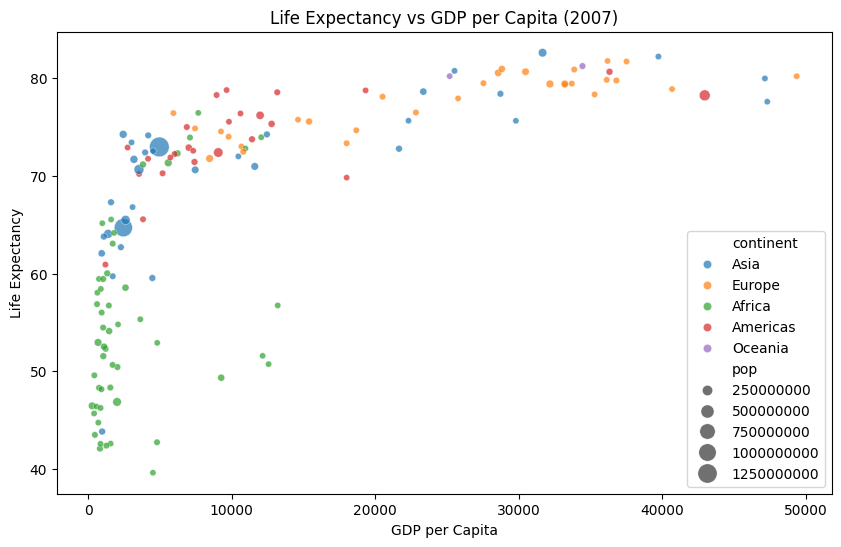

In [ ]:
# We begin by importing Seaborn and giving it an alias.
# Whenever you're using Seaborn, you will also import matplotlib
import seaborn as sns

# Create a scatter plot with Seaborn, coloring by continent and scaling bubbles by population
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_year,
                x='gdpPercap',
                y='lifeExp',
                hue='continent',
                size='pop',
                sizes=(20, 200),
                alpha=0.7)

# Add title and labels
plt.title('Life Expectancy vs GDP per Capita (2007)')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')

# Show the plot
plt.show()

## Enter Plotly: Making our visualization interactive


---
Plotly will allow us to create interactive plots and animations with our data. Let's go ahead and use it to keep exploring our data.

In [ ]:
#Import plotly.express as px
import plotly.express as px


# The sample dataset "Gapminder" is already pre-loaded in Plotly
df = px.data.gapminder()

# Create an interactive scatter plot
fig = px.scatter(df.query("year == 2007"),  # This is how we filter the data by year in plotly using a boolean
                 x="gdpPercap",
                 y="lifeExp",
                 color="continent",
                 size="pop",
                 size_max=70,)

# Customize and show the plot
fig.update_layout(title='Interactive Plot: GDP vs Life Expectancy (2007)')
fig.show()

# Let's run this once, and check our x and y axes and our data points Can we see most of the data clearly? how much information can we get out of this?
# Try adding these parameters to the figure: hover_name="country", size_max=70,, log_x=True

### To better present our case, let's add an animation that goes through the years. Plotly will allow us to do this without having to make several plots.

In [ ]:
import plotly.express as px

# Sample data: Gapminder dataset (available in Plotly)
df = px.data.gapminder()


# Create an interactive scatter plot
fig = px.scatter(df,                             # Notice that we are not filtering the dataset anymore
                 x="gdpPercap",
                 y="lifeExp",
                 animation_frame="year",         # This will allow us to animate by year
                 animation_group="country",      # This plots each country separately
                 size="pop",
                 color="continent",
                 hover_name="country",
                 log_x=True,
                 size_max=70,
                 range_x=[200,60000],             # We can also specify the size of our axes
                 range_y=[25,90])

# Customize and show the plot
fig.update_layout(title='Interactive Plot: GDP vs Life Expectancy')
fig.show()

You did it! It was though, but you used three different libraries to explore your data and created a visualization that can help your audience understand your results.

Here are some questions that can help you think through what we achieved: What are some of the insights that we get from looking at one year of data? What are some insights that we get from looking at the change through five decades? zhow did adding more context to the data help you understand what was happening?

If you want to learn more about Plotly, check out https://plotly.com/python/